In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn

In [95]:
train_X = pd.read_csv('train_features.csv', index_col='match_id_hash')
train_X.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


In [7]:
train_X.info(max_cols=250)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Data columns (total 246 columns):
match_id_hash                 39675 non-null object
game_time                     39675 non-null int64
game_mode                     39675 non-null int64
lobby_type                    39675 non-null int64
objectives_len                39675 non-null int64
chat_len                      39675 non-null int64
r1_hero_id                    39675 non-null int64
r1_kills                      39675 non-null int64
r1_deaths                     39675 non-null int64
r1_assists                    39675 non-null int64
r1_denies                     39675 non-null int64
r1_gold                       39675 non-null int64
r1_lh                         39675 non-null int64
r1_xp                         39675 non-null int64
r1_health                     39675 non-null int64
r1_max_health                 39675 non-null int64
r1_max_mana                   39675 non-null float64
r1_level            

There are no missing values in the data. 30 variables have type float. The rest are of integer type, which can, in fact be categorical (ordinal and not ordinal) data. We can look at the distribution of the values trying to spot any outliers. 

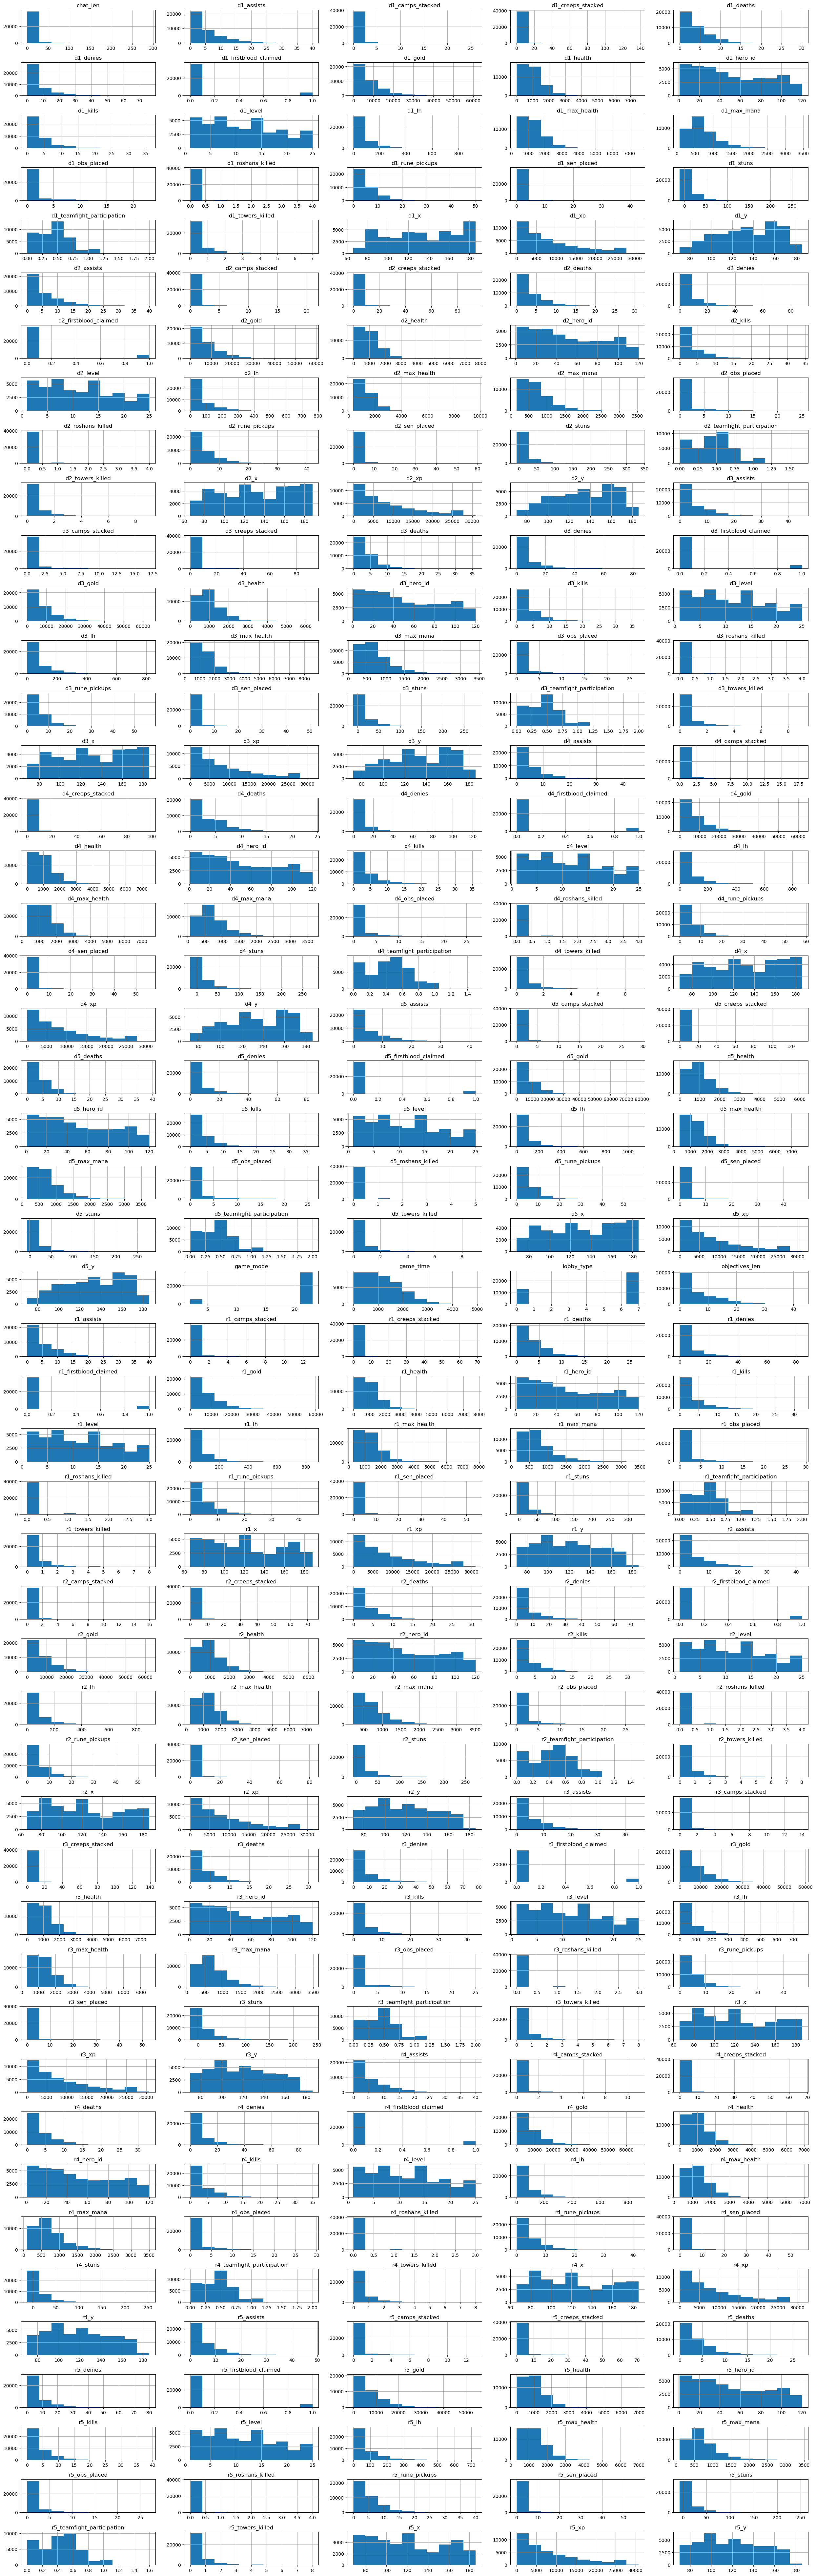

In [149]:
train_X.hist(figsize = (25,80),layout = (50,5), bins=10)
plt.tight_layout()
plt.show()

count    39675.000000
mean         7.338500
std         13.366381
min          0.000000
25%          0.000000
50%          3.000000
75%          9.000000
max        291.000000
Name: chat_len, dtype: float64


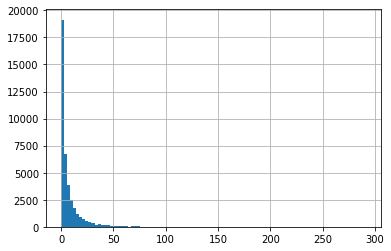

Percentage of chats longer than 100: 0.295


In [46]:
print(train_X['chat_len'].describe())
train_X['chat_len'].hist(bins = 100)
plt.show()

print('Percentage of chats longer than 100: {:.3f}'.format((train_X.shape[0] - train_X[train_X['chat_len']<100].shape[0])/train_X.shape[0]*100))


Analysis (anologous to the one in the above cell) shows that distribution of features like chat_len , camps_stacked, creeps_stacked, roshans_killed, sen_placed are extremely right skewed, but do not have any obvious outliers.

count    39675.000000
mean        19.584776
std          6.304976
min          2.000000
25%         22.000000
50%         22.000000
75%         22.000000
max         23.000000
Name: game_mode, dtype: float64
22    31762
4      3564
23     2546
3      1200
2       408
5       188
12        5
16        2
Name: game_mode, dtype: int64


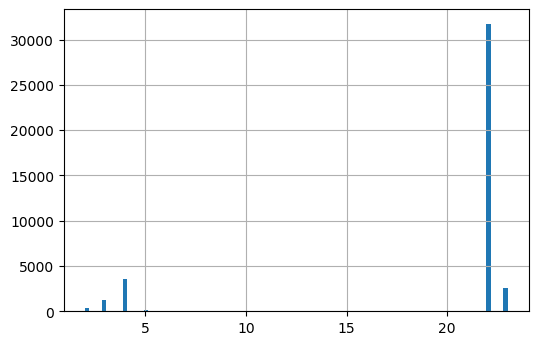

In [148]:
feat = 'game_mode'
print(train_X[feat ].describe())
print(train_X[feat ].value_counts())
train_X[feat ].hist(bins = 100)
plt.show()

count    39675.000000
mean        11.238513
std          6.808209
min          1.000000
25%          5.000000
50%         11.000000
75%         16.000000
max         25.000000
Name: d5_level, dtype: float64
4     2294
5     2188
13    2135
3     2058
6     2057
9     1991
7     1945
14    1852
8     1845
2     1830
10    1776
1     1753
15    1749
11    1738
25    1729
12    1701
16    1406
17    1242
18    1239
19    1049
20     968
21     926
22     832
23     765
24     607
Name: d5_level, dtype: int64


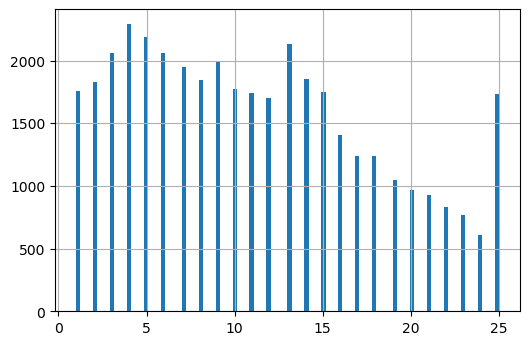

In [147]:
fet = 'd5_level'
print(train_X[fet].describe())
print(train_X[fet].value_counts())
train_X[fet].hist(bins = 100)
plt.show()

Conclusions about categorical variables:
* firstblood_claimed : categorical, binary
* game_mode: categorical, non-ordinal --> needs to be converted to dummy variables
* lobby_type: categorical, binary (value 7 chould be changes with 1)
* hero_id: categorical, non-ordinal (too many levels)
* level: categorical, ordinal (25 levels)
* x,y are coordinates of players

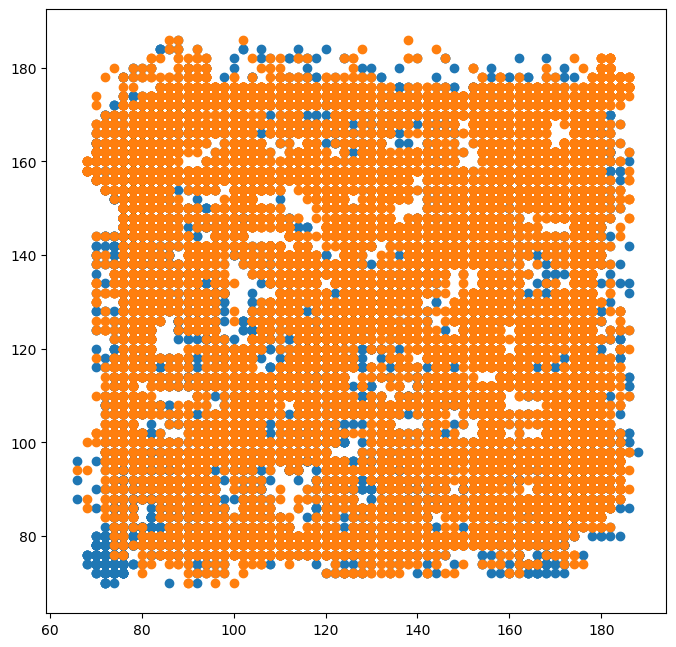

In [161]:
# exploring coordinates
x1 = train_X['r1_x']
y1 = train_X['r1_y']

x2 = train_X['d1_x']
y2 = train_X['d1_y']

plt.figure(figsize=(8,8))
plt.scatter(x1,y1)
plt.scatter(x2,y2)

Bottom left corner is only occupied by Dire team and top right corner is occupied by Radiant players only. The position of the filed should be also explored for the cases of Radiant's victory.

In [94]:
target = pd.read_csv('train_targets.csv', index_col = 'match_id_hash')
target.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [101]:
train_X_radiant = train_X[target.radiant_win]
train_X_dire = train_X[~target.radiant_win]

Text(0.5, 1.0, 'Dire')

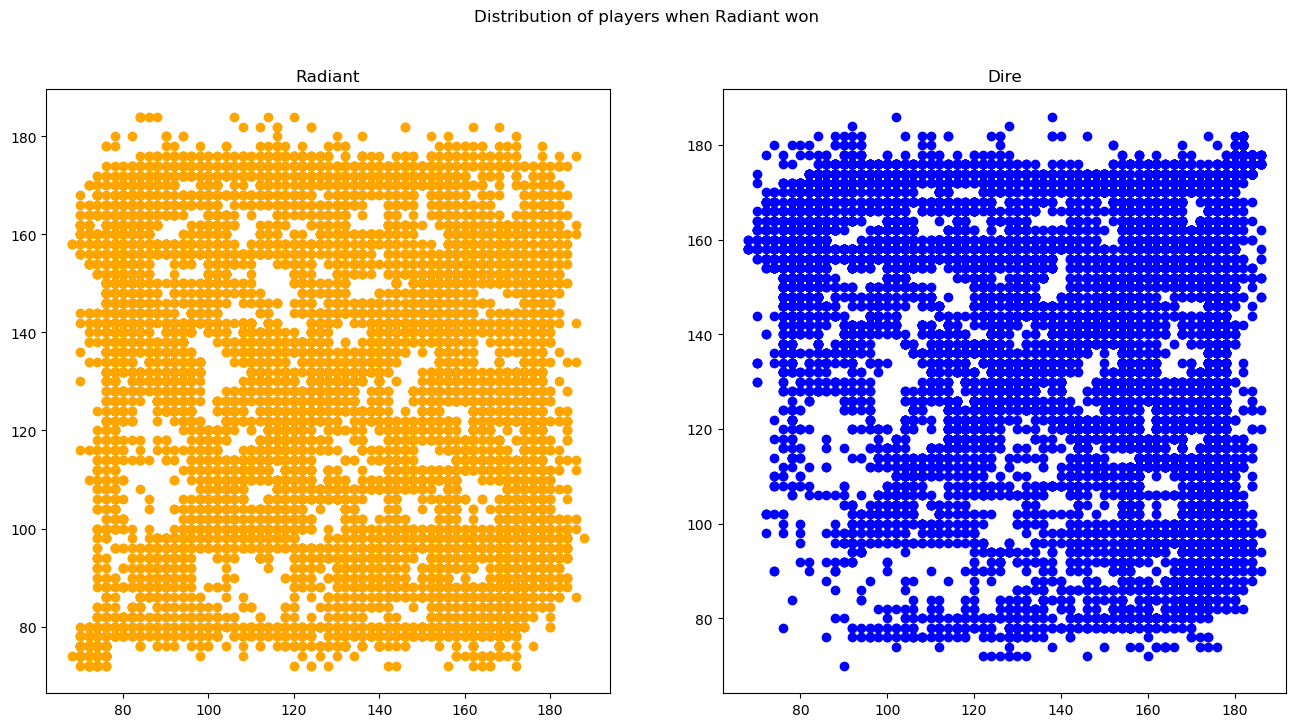

In [144]:
# coordinates distribution when Radiant won
x1 = train_X_radiant['r1_x']
y1 = train_X_radiant['r1_y']

x2 = train_X_radiant['d1_x']
y2 = train_X_radiant['d1_y']

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(16,8))
fig.suptitle('Distribution of players when Radiant won')
ax1.scatter(x1,y1, color = 'orange')
ax1.set_title('Radiant')
ax2.scatter(x2,y2, color = 'blue')
ax2.set_title('Dire')



Text(0.5, 1.0, 'Dire')

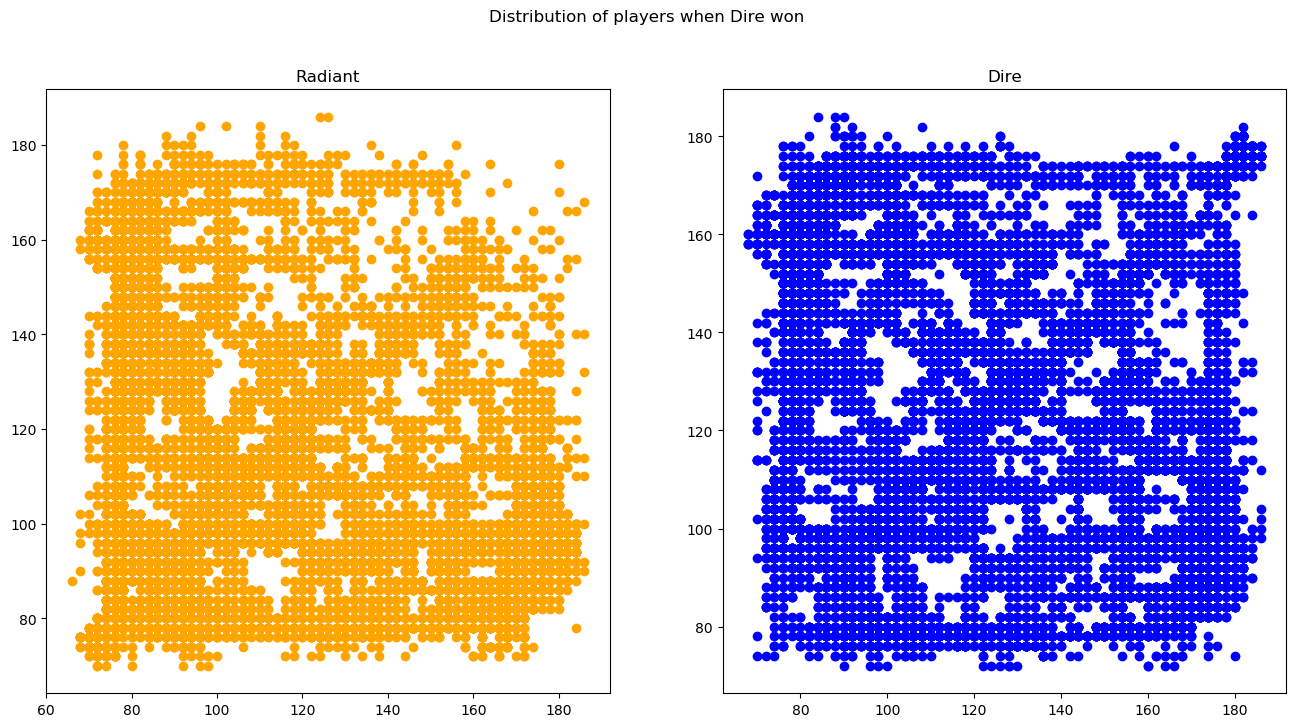

In [142]:
# coordinates distribution when Radiant lost
x1 = train_X_dire['r2_x']
y1 = train_X_dire['r2_y']

x2 = train_X_dire['d3_x']
y2 = train_X_dire['d3_y']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Distribution of players when Dire won')
ax1.scatter(x1,y1, color = 'orange')
ax1.set_title('Radiant')
ax2.scatter(x2,y2, color = 'blue')
ax2.set_title('Dire')


Indeed, the distribution of the players on the map is different in cases when Radiant won or not. The players of the team that has won are spreded, on average, over the whole field. But the team, which has lost, has much more dense presence at its base and less dense presence at the opponent's base. The base for the Radiant is bottom left corner and the base for Dire is upper right corner. A new feature can be built based on coordinates: 'presence_at_opponent_base' which can be binary or an average of indicator function for all five players of the team. 

In [159]:
# identifying bases

print('Radiant: from x = {}, y = {}   to   x = {}, y = {}'.format(x1.min(), y1.min(), x1.min()+30, y1.min()+30))
print('Dire: from x = {}, y = {}   to   x = {}, y = {}'.format(x2.max()-30,y2.max()-30,x2.max(), y2.max()))

radiant_base_x = 96
radiant_base_y = 100

dire_base_x = 156
dire_base_y = 156

Radiant: from x = 66, y = 70   to   x = 96, y = 100
Dire: from x = 156, y = 156   to   x = 186, y = 186


In [160]:
def in_opponent_base(x,y,opponent):
    '''
    returns indicator function of whether the player is in the base of the opponent
    x,y - coordinates
    opponent = {'Radient', 'Dire'} - opponent team
    '''
    radiant_base_x = 96
    radiant_base_y = 100

    dire_base_x = 156
    dire_base_y = 156
    
    if opponent == 'Radient':
        if x <= radiant_base_x and y <= radiant_base_y:
            return 1
        else:
            return 0
    elif opponent == 'Dire':
        if x >= dire_base_x and y >= dire_base_y:
            return 1
        else:
            return 0
    else:
        return NaN
    


70